# Building a Classifier with Clustering

### Clustering

Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).
It can be considered the most important unsupervised learning problem and as every other problem of this kind, it deals with finding a structure in a collection of unlabeled data.
There is no universal definition of what a cluster is: it really depends on the context, and different algorithms will capture different kind of clusters.
Some algorithms look for instances centered around a particular point, called a centroid, other look for continuous regions of densely packed instances and they can take on any shape, and other are hierarchical, looking for clusters of clusters.

### Goal of the project

So many different clustering algorithms have been developed, but each of them only captures some aspects of the clusters. These aspects include the size, shape, density, hierarchy, overlapping or disjointness of cluster, as well as detecting outliers or noise. Thus, there is no ‘true’ clustering algorithm.
Clustering algorithms perform much worse compared to vlassification methods.
If we had labelled daat we should use classification or regression instead of clustering, for a reason: the clustering does not know which problem to solve, and there may well be more than one. We have no control over it, we can't force it solving anything related to our task. 
Anyway in this project we want to explore the main clustering methods (K-Means, DBSCAN, Hierarchical Clustering) and the concepts around them, and then we'll evaluate the models' performance with labelled data.

# Data Set

### Data Info

A complex modern semi-conductor manufacturing process is normally under consistent surveillance via the monitoring of signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. It is often the case that useful information is buried in the latter two. Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs.
More information can be found on the [official repository site](https://archive.ics.uci.edu/ml/datasets/SECOM).

### Data Description

The data consists of 2 files:
* The dataset file SECOM consisting of 1567 examples each with 590 features (1567 x 590 matrix) 
* A labels file containing the time stamp and the classifications for each example, where –1 corresponds to a pass and 1 corresponds to a fail 

### Data Cleaning and Manipulation

In [142]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
data = pd.read_csv("secom_data.csv", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [144]:
print("Rows: {}".format(len(data)))
print("Columns: {}".format(len(data.columns)))

Rows: 1567
Columns: 590


In [145]:
labels = pd.read_csv("secom_labels.csv", header=None)
labels.head()

,0,1
0,-1,19/07/2008 11:55:00
1,-1,19/07/2008 12:32:00
2,1,19/07/2008 13:17:00
3,-1,19/07/2008 14:43:00
4,-1,19/07/2008 15:22:00


In [146]:
print("Rows: {}".format(len(labels)))
print("Columns: {}".format(len(labels.columns)))

Rows: 1567
Columns: 2


In [147]:
len(labels[labels[0] == 1])

104

In [148]:
print("Fail Percentage: {0:.3}".format((len(labels[labels[0] == 1]))/(len(labels))*100))

Fail Percentage: 6.64


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: 'label' must be of length 'x'

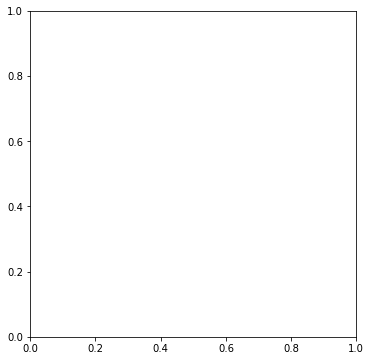

In [156]:
pie, ax = plt.subplots(figsize=[10,6])
#labels = data.keys()
plt.pie(x=labels[0], autopct="%.1f%%", explode=[0.05]*4, labels=[1,-1], pctdistance=0.5)
plt.title("Delivery Tips by type", fontsize=14)
plt.show()

In [149]:
print("Null values BEFORE drop: {}".format(data.isnull().any().any()))
data = data.drop(data.columns[data.isna().mean() >= 0.25], axis=1)
for col in data.columns:
    data[col] = data[col].fillna(data[col].mean())
print("Null values AFTER drop: {}".format(data.isnull().any().any()))

Null values BEFORE drop: True
Null values AFTER drop: False


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 558 entries, 0 to 589
dtypes: float64(558)
memory usage: 6.7 MB


In [151]:
data[5].value_counts()

100.0    1567
Name: 5, dtype: int64

In [152]:
for col in data.columns:
    if len(data[col].unique()) == 1:
        data.drop(col,inplace=True,axis=1)
data.info()       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 442 entries, 0 to 589
dtypes: float64(442)
memory usage: 5.3 MB
